In [127]:
# Import needed packages
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import skew, kurtosis

In [228]:
import pandas as pd

# Lade die Daten aus den CSV-Dateien
data_2020 = pd.read_csv('/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/comparison/cleaned_data_last_2020.csv')
data_2021 = pd.read_csv('/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/comparison/cleaned_data_last_2021.csv')
data_2022 = pd.read_csv('/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/comparison/cleaned_data_last_2022.csv')

# Füge die Daten zusammen
all_data = pd.concat([data_2020, data_2021, data_2022])

# Speichere die zusammengefügten Daten in einer neuen CSV-Datei
all_data.to_csv('/Users/seyyiduzun/Documents/Bachelorarbeit/Bachelorarbeit/stage 1/data/checkpoints/all_cleaned_data_.csv', index=False)

In [231]:
all_data.head(3)

,company,datatype,date,internal,title,cleaned_content,word_tokens,sentence_tokens,pos_tagged_word_tokens,pos_tagged_sentence_tokens,...,symbol,market_cap_in_usd_b,country,sector,industry,st1_sentiment_continuous,cnt_word,cnt_sentence,ratio_word_sentence,market_cap_group
0,Infineon,Sustainability Report,2020,1,the,sustainability supplementing annual report nav...,"['sustainability', 'supplementing', 'annual', ...",['sustainability supplementing annual report n...,"[('sustainability', 'NN'), ('supplementing', '...","[[('sustainability', 'NN'), ('supplementing', ...",...,IFX,50.42,Germany,Technology,Semiconductors,0.018620,15088,954,15.815514,Large
1,BASF,Sustainability Report,2020,1,the,chapter page 2manage ments report overview non...,"['chapter', 'page', '2manage', 'ments', 'repor...",['chapter pages ment report overview nonfinanc...,"[('chapter', 'NN'), ('page', 'NN'), ('2manage'...","[[('chapter', 'NN'), ('ment', 'NN'), ('report'...",...,BAS,44.37,Germany,Basic Materials,Chemicals,0.017913,11976,704,17.011364,Medium
2,HeidelbergMaterials,Sustainability Report,2020,1,",",unternehmens portrat strategie management wirt...,"['unternehmens', 'portrat', 'strategie', 'mana...",['unternehmens portrat strategie management wi...,"[('unternehmens', 'NNS'), ('portrat', 'VBP'), ...","[[('unternehmens', 'VBZ'), ('portrat', 'JJ'), ...",...,HEI,14.65,Germany,Basic Materials,Building Materials,0.016752,42203,2542,16.602282,Medium


In [35]:
average_sentiment_by_company_and_year = all_data.groupby(['company', 'date'])['st1_sentiment_continuous'].mean()

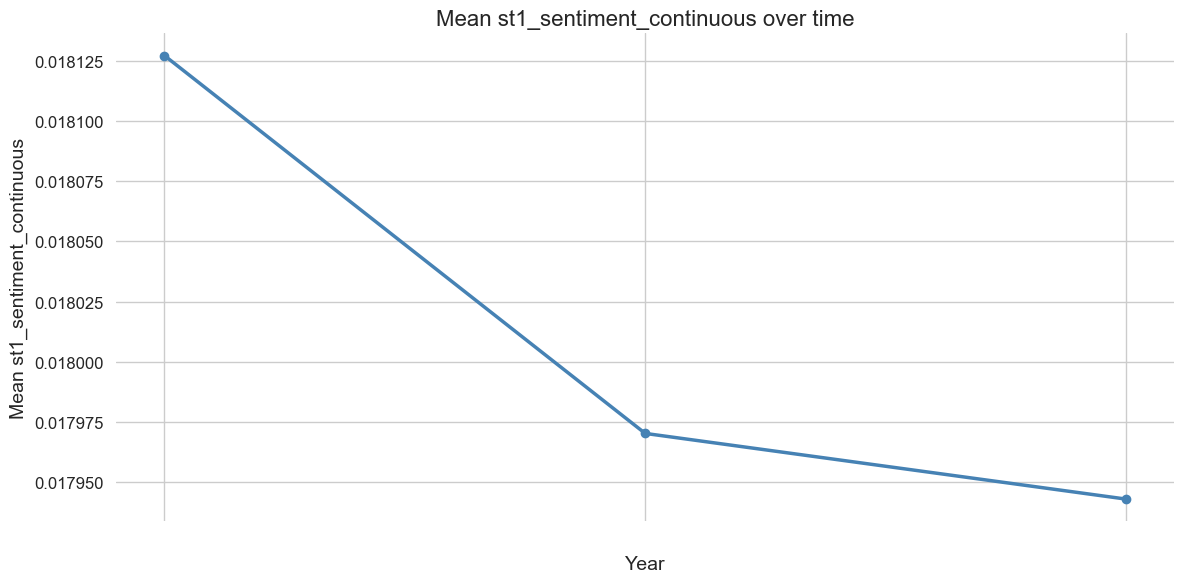

In [166]:
# Definiere die plot_time_series Funktion
def plot_time_series(data, column, title=None, ylabel=None, start=2020, end=2022, agg_func="mean", ax=None, show=True):
    # Filter data based on the start and end dates
    if start:
        data = data[data['date'] >= start]
    if end:
        data = data[data['date'] <= end]

    # Group data by date and calculate the mean sentiment
    grouped_data = data.groupby('date')[column].agg(agg_func)
    ax = grouped_data.plot(ax=ax, figsize=(12, 6), color='steelblue', linewidth=2.5, marker='o')

    # Customize the plot aesthetics
    ax.set_title(title or f'{agg_func.capitalize()} {column} over time', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel(ylabel or f'{agg_func.capitalize()} {column}', fontsize=14)
    
    # Set x-ticks to whole years
    ax.set_xticks(range(start, end+1))
    ax.set_xticklabels([str(year) for year in range(start, end+1)]) # updated line
    
    plt.xticks(fontsize=12)
    for label in ax.get_xticklabels():
        label.set_rotation(0)
        label.set_color('white')
    plt.yticks(fontsize=12)
    sns.despine(left=True, bottom=True)

    if show:
        plt.tight_layout()
        plt.show()

# Plotte die Daten
fig, ax = plt.subplots(figsize=(18, 6))

plot_time_series(data, 'st1_sentiment_continuous', ax=ax, show=True)


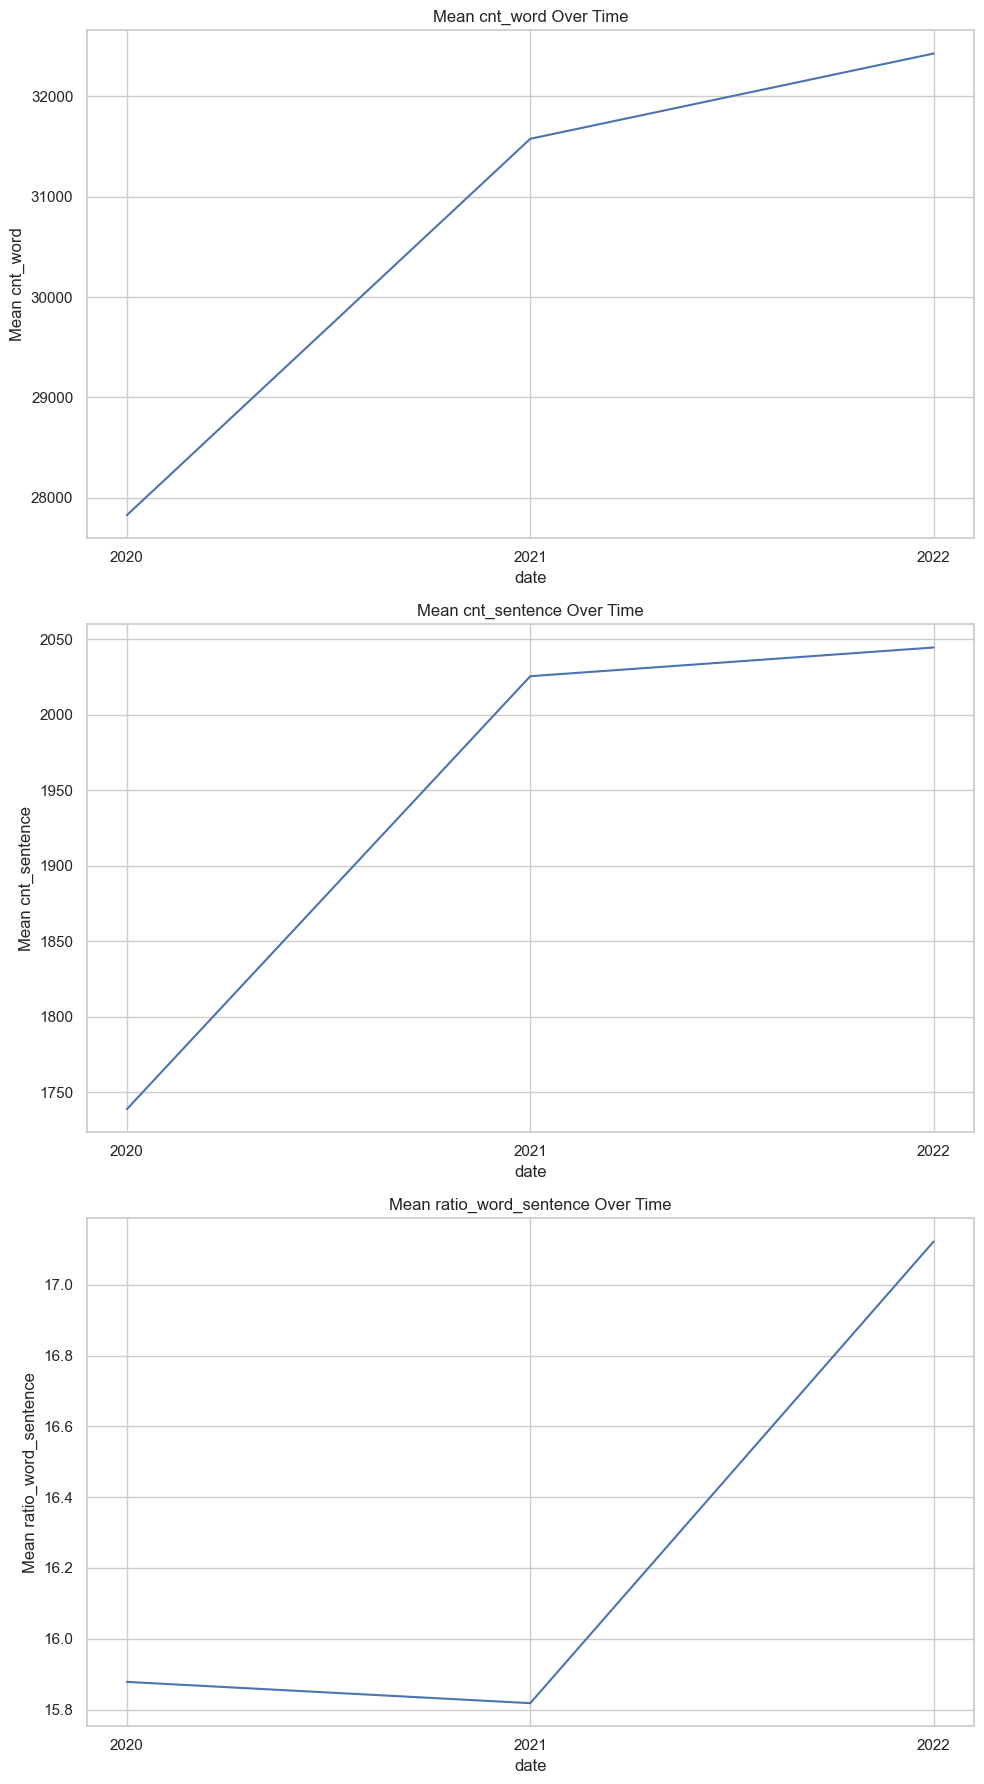

In [167]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator

# Erstellen Sie eine Kopie von 'all_data'
data = all_data.copy()

# Interpretieren Sie 'date' als Ganzzahl
data['date'] = data['date'].astype(int)

# Setzen Sie 'date' als Index
data.set_index('date', inplace=True)

# Gruppieren Sie die Daten nach Jahr und berechnen Sie das Durchschnitt von 'cnt_word', 'cnt_sentence' und 'ratio_word_sentence'
grouped_data = data[['cnt_word', 'cnt_sentence', 'ratio_word_sentence']].groupby('date').mean()

# Erstellen Sie die Plots
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

grouped_data['cnt_word'].plot(kind='line', ax=axs[0])
axs[0].set_title('Mean cnt_word Over Time')
axs[0].set_ylabel('Mean cnt_word')
axs[0].grid(True)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))

grouped_data['cnt_sentence'].plot(kind='line', ax=axs[1])
axs[1].set_title('Mean cnt_sentence Over Time')
axs[1].set_ylabel('Mean cnt_sentence')
axs[1].grid(True)
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

grouped_data['ratio_word_sentence'].plot(kind='line', ax=axs[2])
axs[2].set_title('Mean ratio_word_sentence Over Time')
axs[2].set_ylabel('Mean ratio_word_sentence')
axs[2].grid(True)
axs[2].xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

In [89]:
print(all_data['date'].dtypes)

int64


In [180]:
# Summe von 'cnt_word' über die Zeit nach 'sector'
cnt_word_by_sector_and_year = all_data.groupby(['sector', 'date'])['cnt_word'].sum()
print(cnt_word_by_sector_and_year)


sector                  date
Basic Materials         2020    142909
                        2021    170942
                        2022    157054
Communication Services  2020     45768
                        2021     56537
                        2022     62127
Consumer Discretionary  2020    186523
                        2021    230899
                        2022    219602
Consumer Staples        2020     57691
                        2021     39105
                        2022     80125
Financials              2020    151564
                        2021    185106
                        2022    204281
Healthcare              2020    131082
                        2021    151683
                        2022    187552
Industrials             2020     87728
                        2021    139961
                        2022    146414
Real Estate             2020     33954
                        2021     36500
                        2022     36064
Technology              2020    105

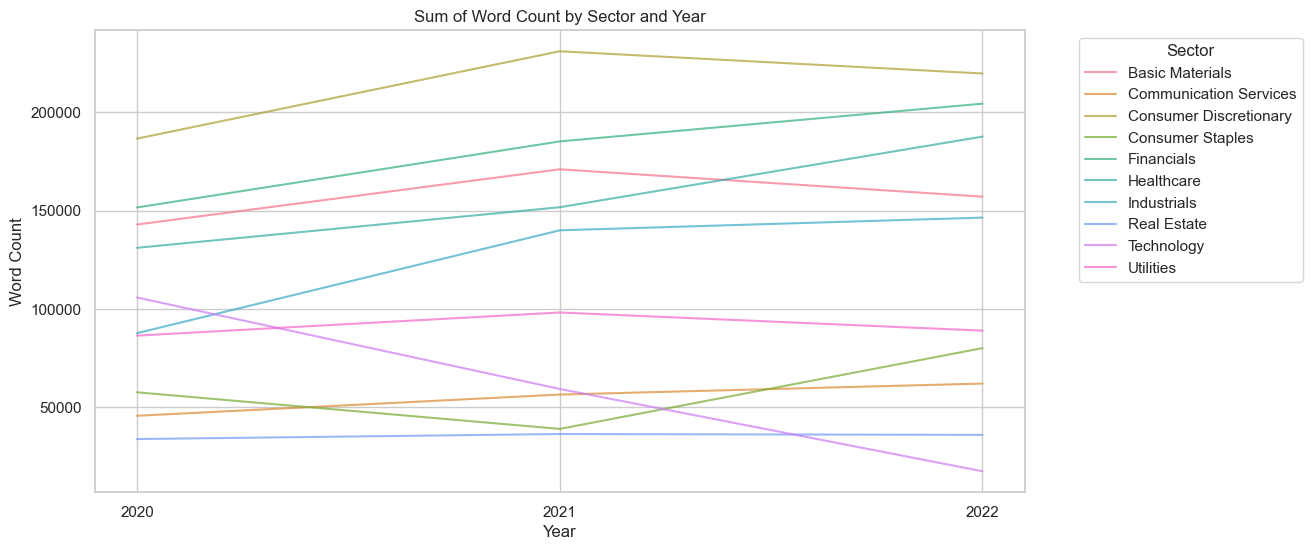

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette
colors = sns.color_palette('husl', n_colors=len(pivot_table.columns))

# Group the data by sector and year, and calculate the sum of 'cnt_word'
grouped_data = all_data.groupby(['sector', 'date'])['cnt_word'].sum()

# Pivot the data to create a table with sectors as rows and years as columns
pivot_table = grouped_data.reset_index().pivot(index='date', columns='sector', values='cnt_word')

# Define the figure size
plt.figure(figsize=(12, 6))

# Plot the pivot table as a line plot
pivot_table.plot(kind='line', ax=plt.gca(), alpha=0.7, color=colors)

# Set the x-tick labels to the year values
plt.xticks(pivot_table.index)

# Set the plot title and axis labels
plt.title('Sum of Word Count by Sector and Year')
plt.xlabel('Year')
plt.ylabel('Word Count')

# Set the legend outside the plot
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

* Financials: constant increase
* Technology: constant decrease 
* Communication Discretionary: highest sum of Word Count than other sectors

In [187]:
# Calculate the ratio_word_sentence for each sector and each year
ratio_word_sentence_by_sector_and_year = all_data.groupby(['sector', 'date'])['ratio_word_sentence'].mean()

# Print the result
print(ratio_word_sentence_by_sector_and_year)


sector                  date
Basic Materials         2020    15.908037
                        2021    15.826642
                        2022    15.890108
Communication Services  2020    15.430883
                        2021    15.181794
                        2022    14.845161
Consumer Discretionary  2020    15.555428
                        2021    15.321287
                        2022    16.155539
Consumer Staples        2020    15.058595
                        2021    16.475871
                        2022    15.400871
Financials              2020    16.769309
                        2021    15.617838
                        2022    16.176218
Healthcare              2020    14.676632
                        2021    15.783786
                        2022    16.288598
Industrials             2020    16.310953
                        2021    16.302069
                        2022    16.863789
Real Estate             2020    15.511192
                        2021    15.705680
     

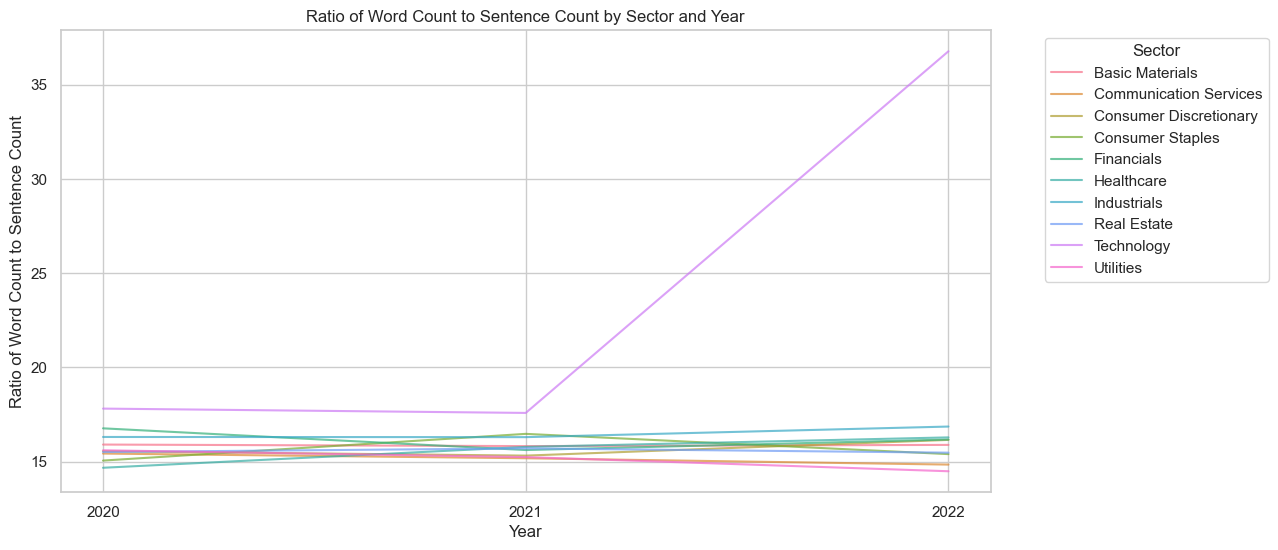

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette
colors = sns.color_palette('husl', n_colors=len(all_data['sector'].unique()))

# Pivot the data to create a table with sectors as rows and years as columns
pivot_table = all_data.pivot_table(index='date', columns='sector', values='ratio_word_sentence', aggfunc='mean')

# Define the figure size
plt.figure(figsize=(12, 6))

# Plot the pivot table as a line plot
pivot_table.plot(kind='line', ax=plt.gca(), alpha=0.7, color=colors)

# Set the x-tick labels to the year values
plt.xticks(pivot_table.index)

# Set the plot title and axis labels
plt.title('Ratio of Word Count to Sentence Count by Sector and Year')
plt.xlabel('Year')
plt.ylabel('Ratio of Word Count to Sentence Count')

# Set the legend outside the plot
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

No specific pattern. The ratio drastically increased for the Technology sector in year 2022.

# Sentiment Analysis / Polarity of the documents


In [193]:
average_sentiment_per_company = all_data.groupby('company')['st1_sentiment_continuous'].mean()


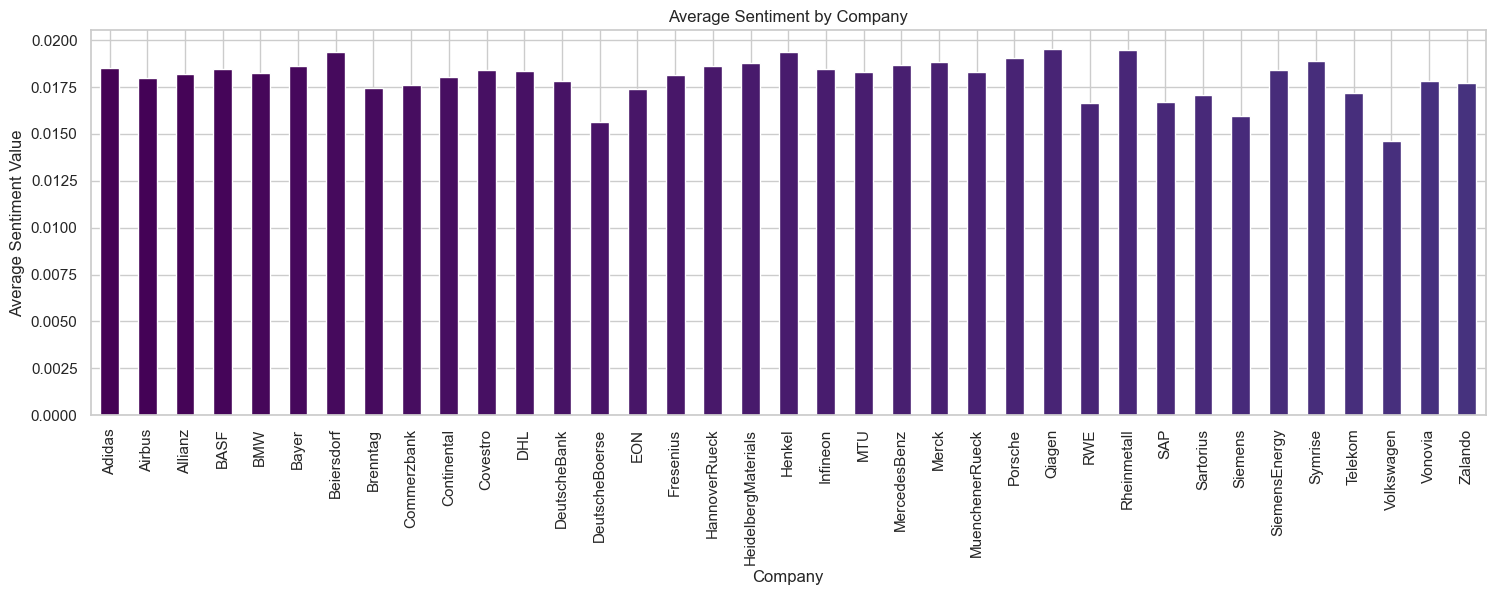

In [191]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get the 'viridis' color map
cmap = plt.get_cmap('viridis')

# Generate a list of colors from the color map
colors = [cmap(i) for i in range(len(average_sentiment_per_company))]

average_sentiment_per_company.plot(kind='bar', figsize=(18, 5), color=colors)
plt.title('Average Sentiment by Company')
plt.xlabel('Company')
plt.ylabel('Average Sentiment Value')
plt.xticks(rotation=90)
plt.show()

/var/folders/ln/8_743tps409d2_3d_6px3_nc0000gn/T/ipykernel_80216/2819562449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='company', y='st1_sentiment_continuous', palette='viridis')


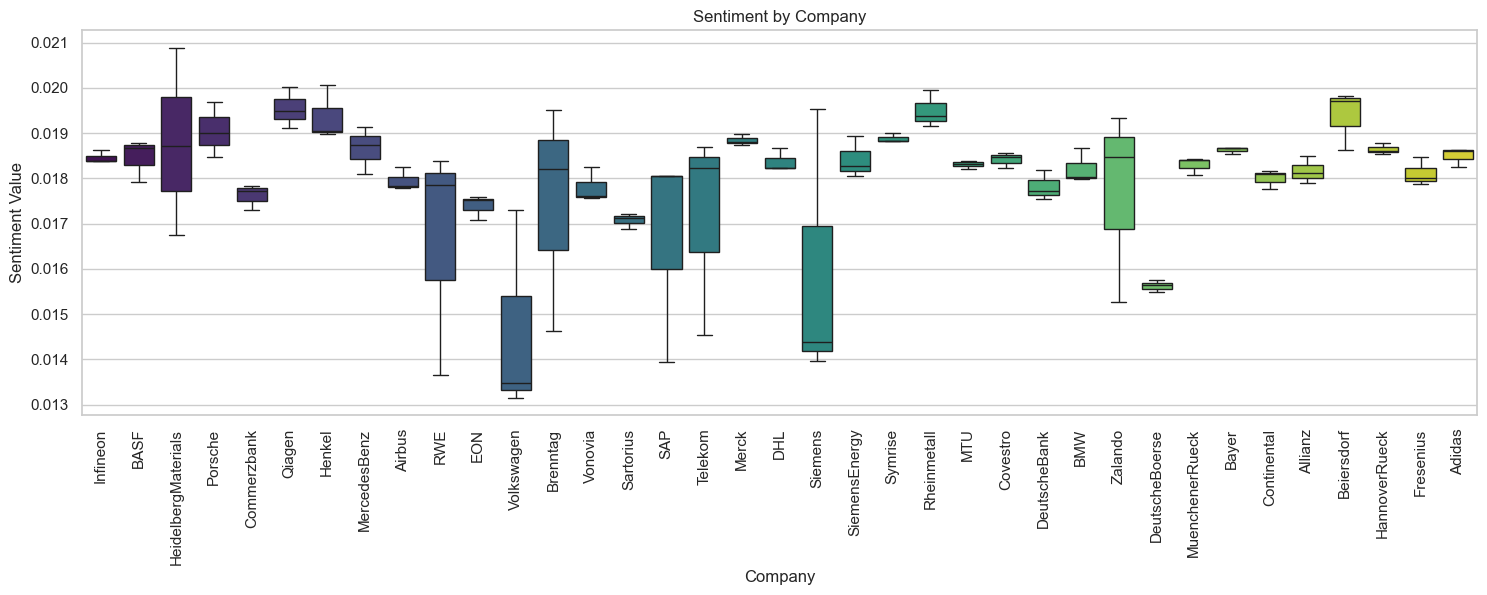

In [197]:
plt.figure(figsize=(18, 5))
sns.boxplot(data=all_data, x='company', y='st1_sentiment_continuous', palette='viridis')
plt.title('Sentiment by Company')
plt.xlabel('Company')
plt.ylabel('Sentiment Value')
plt.xticks(rotation=90)
plt.show()

The sentiment of the sustainability reports by company shows a rather unbalanced picture with a tendency to only positive sentiments.


/var/folders/ln/8_743tps409d2_3d_6px3_nc0000gn/T/ipykernel_80216/1075603492.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='sector', y='st1_sentiment_continuous', palette='viridis')


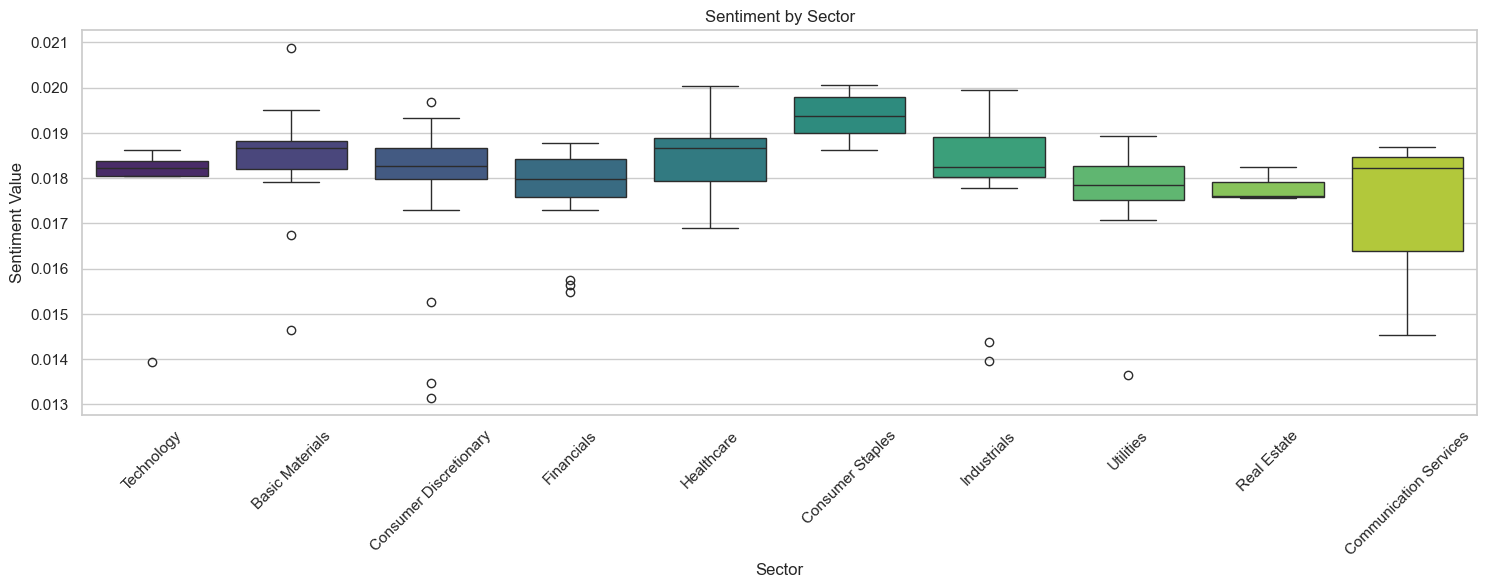

In [105]:
plt.figure(figsize=(18, 5))
sns.boxplot(data=all_data, x='sector', y='st1_sentiment_continuous', palette='viridis')
plt.title('Sentiment by Sector')
plt.xlabel('Sector')
plt.ylabel('Sentiment Value')
plt.xticks(rotation=45)
plt.show()

Also the sentiment by sector is showing a rather unbalanced picture, obviously with the same tendency to an only positive sentiment.
The sectors Consumer Discretionary (also includes Auto Manufacturers) and Industrials are showing most of the less positive outliers.

/var/folders/ln/8_743tps409d2_3d_6px3_nc0000gn/T/ipykernel_80216/1627816433.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_by_sector, x='sector', y='st1_sentiment_continuous', palette='tab10')


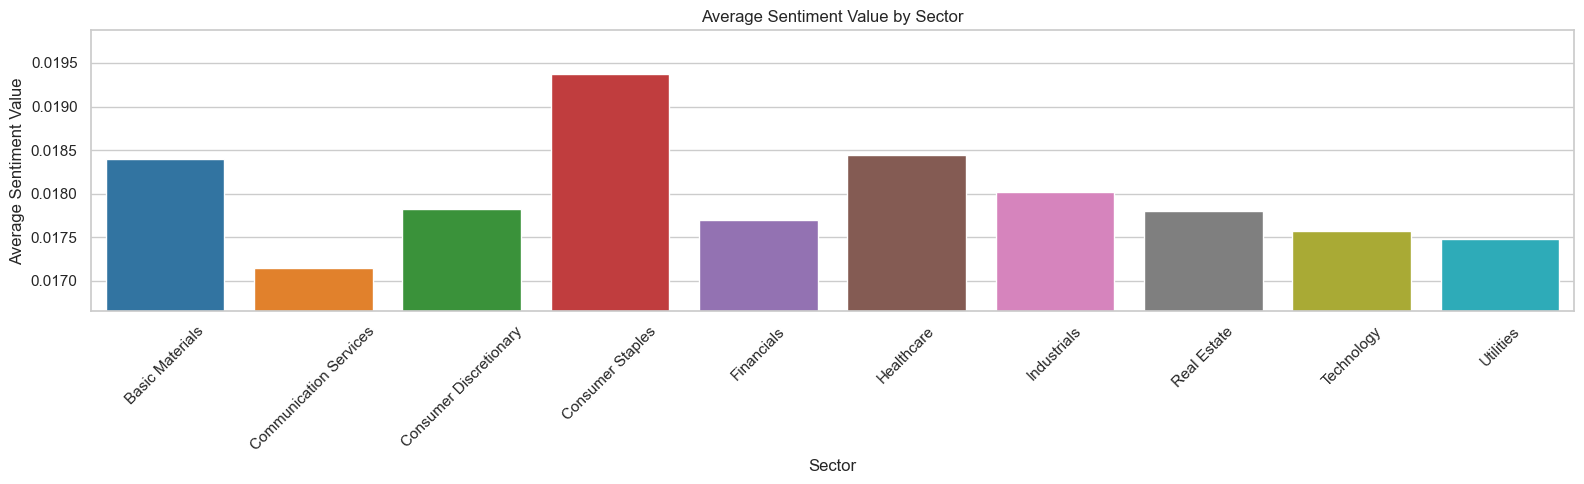

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))

# Aggregate sentiment value by sector
sentiment_by_sector = all_data.groupby('sector').agg({'st1_sentiment_continuous': 'mean'}).reset_index()

sns.barplot(data=sentiment_by_sector, x='sector', y='st1_sentiment_continuous', palette='tab10')
plt.title('Average Sentiment Value by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Sentiment Value')
plt.xticks(rotation=45)

# Set the y-axis limits to better visualize the differences in bar heights
plt.ylim(sentiment_by_sector['st1_sentiment_continuous'].min() - 0.0005, sentiment_by_sector['st1_sentiment_continuous'].max() + 0.0005)

plt.tight_layout()
plt.show()

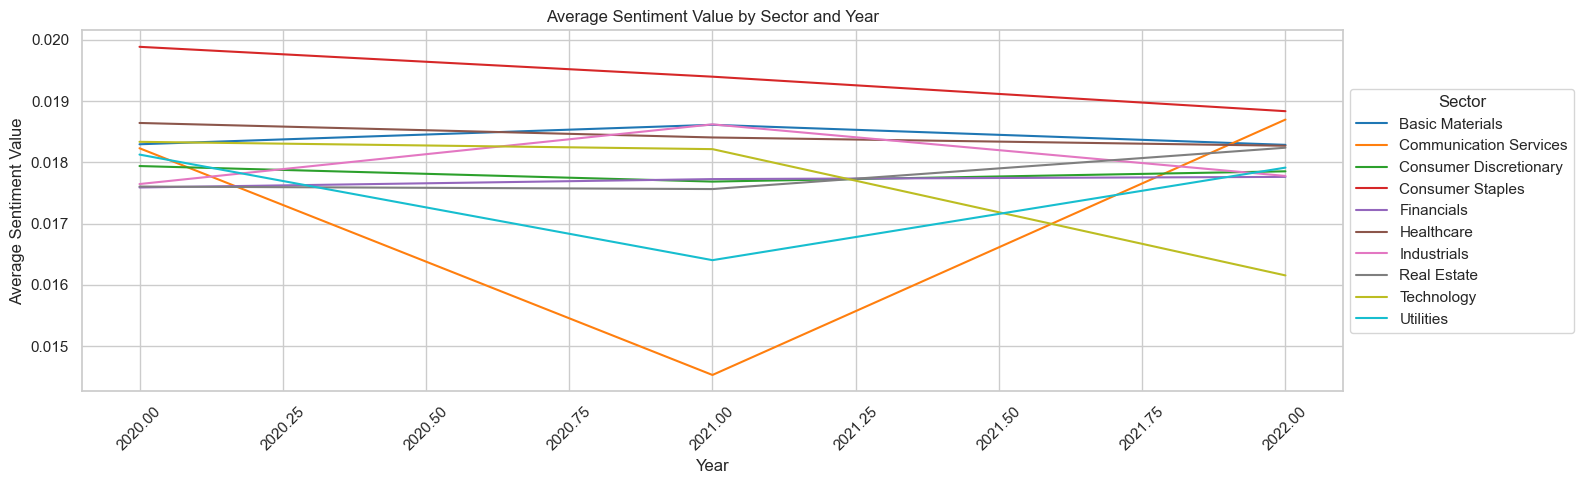

In [123]:
# Assign 'year' column directly from 'date' column
all_data['year'] = all_data['date']

# Calculate average sentiment by sector and year
average_sentiment_per_sector_year = all_data.groupby(['sector', 'year'])['st1_sentiment_continuous'].mean().reset_index()

# Plot the results
plt.figure(figsize=(16, 5))
sns.lineplot(data=average_sentiment_per_sector_year, x='year', y='st1_sentiment_continuous', hue='sector', palette='tab10')
plt.title('Average Sentiment Value by Sector and Year')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Value')
plt.xticks(rotation=45)
plt.legend(title='Sector', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

The sentiment over time is showing no specific pattern.

In [ ]:
# Define a function to convert a string representation of a list to a list datatype
def string_to_list(string):
    try:
        return ast.literal_eval(string)
    except (ValueError, SyntaxError):
        print('List conversion failed')
        return []

# Convert the string representations of the lists to the correct 'list' datatype
all_data['word_tokens'] = all_data['word_tokens'].apply(string_to_list)
all_data['sentence_tokens'] = all_data['sentence_tokens'].apply(string_to_list)
all_data['pos_tagged_word_tokens'] = all_data['pos_tagged_word_tokens'].apply(string_to_list)
all_data['pos_tagged_sentence_tokens'] = all_data['pos_tagged_sentence_tokens'].apply(string_to_list)


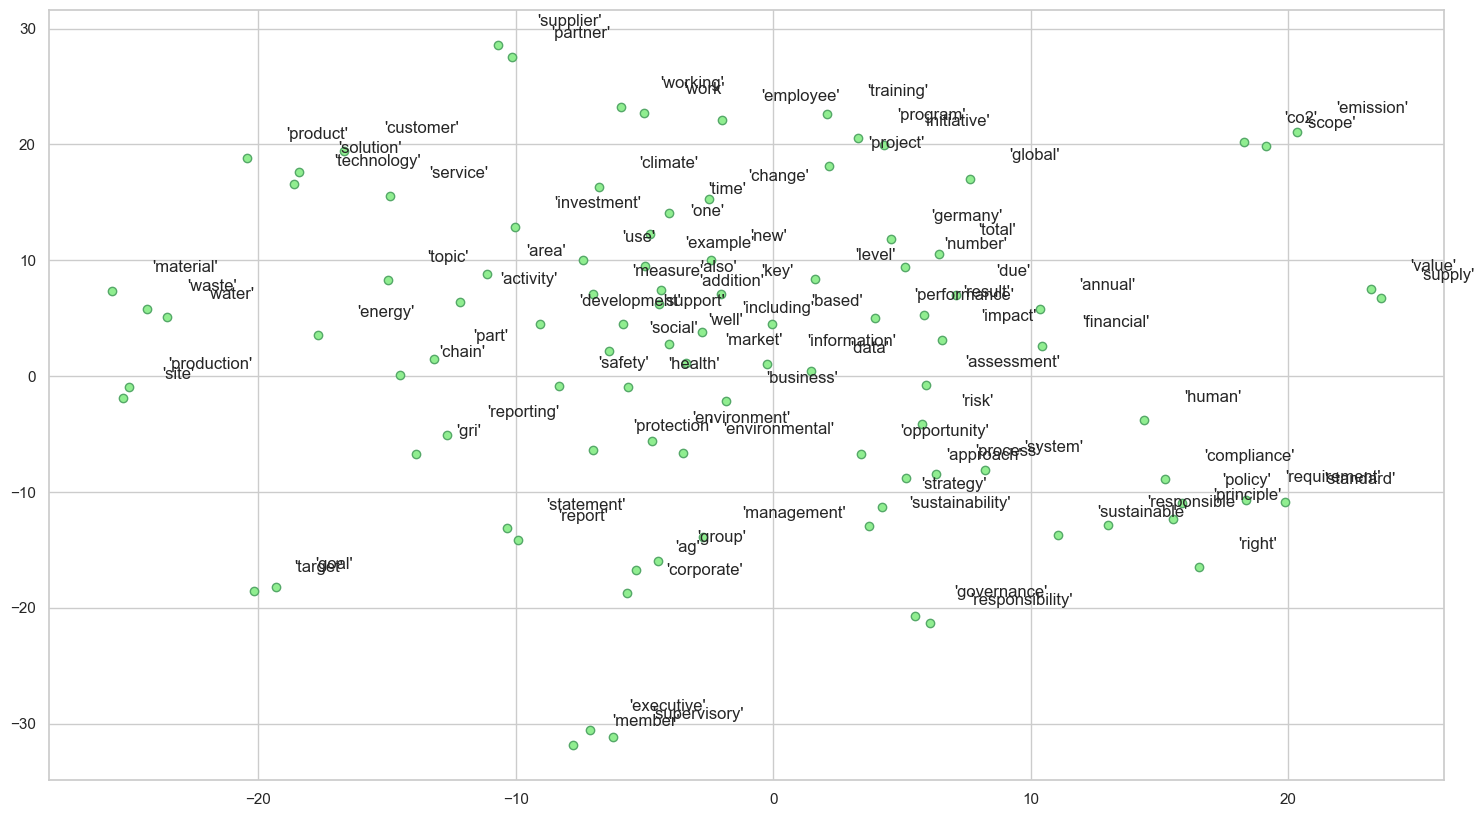

In [229]:
# Make a copy of all_data
data_copy = all_data.copy()

# Remove rows with NaN values in the 'word_tokens' column
data_copy = data_copy[data_copy['word_tokens'].notna()]

# Convert the 'word_tokens' column to lists of words
data_copy['word_tokens'] = data_copy['word_tokens'].str.split(', ')

all_words = [word for word_list in data_copy['word_tokens'] for word in word_list]

# Count the occurrences of each word and find the top 100 words
word_counts = Counter(all_words)
top_100_words = [word for word, _ in word_counts.most_common(100)]

# Train a Word2Vec model on the combined words with a fixed seed (42 is always the answer)
w2vmodel = Word2Vec(data_copy['word_tokens'], vector_size=100, window=5, min_count=1, workers=4, seed=42)

# Get the embeddings of the top 100 words
wvs = w2vmodel.wv[top_100_words]

# Use t-SNE to reduce the dimensions of the embeddings with a fixed seed
tsne = TSNE(n_components=2, random_state=42, n_iter=10000, perplexity=5)
T = tsne.fit_transform(wvs)
labels = top_100_words

plt.figure(figsize=(18, 10))
plt.scatter(T[:, 0], T[:, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label,
                 xy=(x + 1, y + 1),
                 xytext=(10, 5),
                 textcoords='offset points')

plt.show()

The clustering of the word embeddings by the Word2Vec model gives hints to underlying dataset.
It can be obsverved that several correct clusters are calculated, which is a hint that the cleaning/preprocessing is sufficient.
Is there still noise?

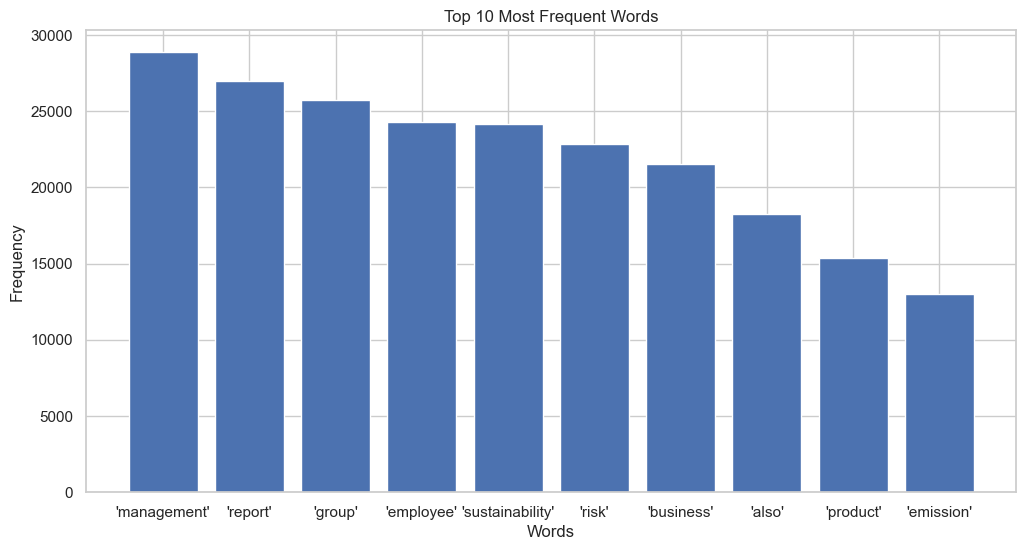

In [233]:
import copy
import matplotlib.pyplot as plt
from collections import Counter

# Make a copy of all_data
all_data_copy = copy.deepcopy(all_data)

# Convert the 'word_tokens' column to lists of words
all_data_copy['word_tokens'] = all_data_copy['word_tokens'].str.split(', ')

# Flatten the list of lists of tokens, filter out single-character words, and count the frequency of each word
word_freq = Counter(word for tokens in all_data_copy['word_tokens'] for word in tokens if len(word) > 1)

# Get the 10 most common words
top_10_words = word_freq.most_common(10)

# Extract the words and their frequencies
words = [word for word, freq in top_10_words]
freqs = [freq for word, freq in top_10_words]

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart
ax.bar(words, freqs)
ax.set_title('Top 10 Most Frequent Words')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
plt.show()
